In [11]:
import warnings; warnings.simplefilter('ignore')

import os
import time
import torch
import itertools
import random
import torch.nn as nn
from cell import graph_utils, utils, plot_utils
from cell.Word2vec import prepare_vocab, dataloader, wv
from stellargraph import StellarGraph
from torch.nn import functional as F
from stellargraph.data import BiasedRandomWalk
import cell.BiasedDirectedWeightedWalk as BDWW
from stellargraph import StellarDiGraph
import seaborn as sns
from IPython.display import Image
from cell import coupled_wv as cp
import cell.math_utils as mu
from cell import analysis

os.environ['KMP_DUPLICATE_LIB_OK']='True'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

For the example in their paper:

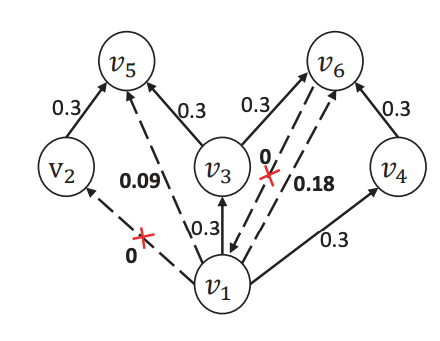

In [12]:
Image("/Users/fahimehb/Documents/NPP_GNN_project/code/HOPE.png", width=250, height=50)

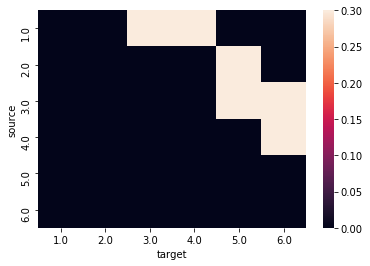

In [13]:
edges = pd.DataFrame([[1, 3, 0.3],
                      [1, 4, 0.3],
                      [2, 5, 0.3], 
                      [2, 1, 0], 
                      [2, 3, 0], 
                      [2, 4, 0], 
                      [2, 6, 0], 
                      [3, 5, 0.3], 
                      [3, 1, 0], 
                      [3, 2, 0], 
                      [3, 4, 0], 
                      [3, 6, 0.3],
                      [4, 6, 0.3], 
                      [4, 1, 0], 
                      [4, 2, 0], 
                      [4, 3, 0], 
                      [4, 5, 0], 
                      [5, 1, 0], 
                      [5, 2, 0], 
                      [5, 3, 0], 
                      [5, 4, 0], 
                      [5, 6, 0], 
                      [6, 1, 0], 
                      [6, 2, 0], 
                      [6, 3, 0], 
                      [6, 4, 0], 
                      [6, 5, 0]], columns=['source', 'target', 'weight'])

weight_mat = graph_utils.return_weight_mat_from_edgelist(edges, directed=True)
sns.heatmap(weight_mat)
adj = weight_mat.astype(float)

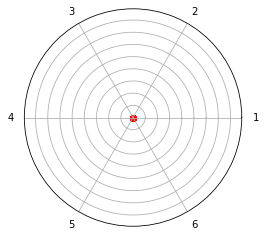

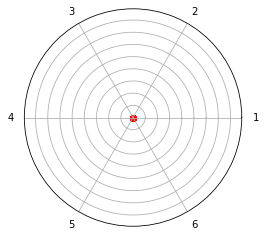

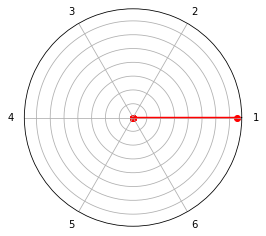

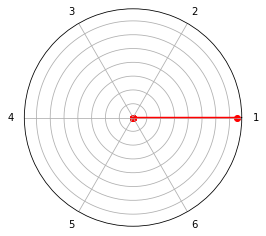

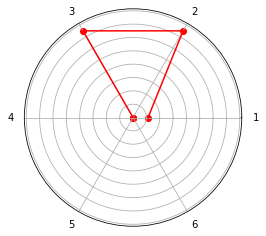

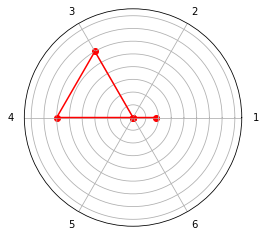

In [15]:
Katz = analysis.Katz_proximity(adj, beta = 0.5)
U_s, U_t = analysis.nmf_factorization(Katz, n_components=3)
s_to_t, t_to_s = analysis.return_right_left_similarity(U_s, U_t)
theta = graph_utils.return_theta(6)

for n in range(6):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
#     c = ax.plot(theta, s_to_t[n][[i for i in range(0,6)]])
#     c = ax.scatter(theta, s_to_t[n][[i for i in range(0,6)]])
    c = ax.plot(theta, t_to_s[n][[i for i in range(0,6)]], c='red')
    c = ax.scatter(theta, t_to_s[n][[i for i in range(0,6)]], c='red')
    ax.set_xticks(theta)
    ax.set_xticklabels([str(i) for i in range(1,7)])
    ax.set_yticklabels([])

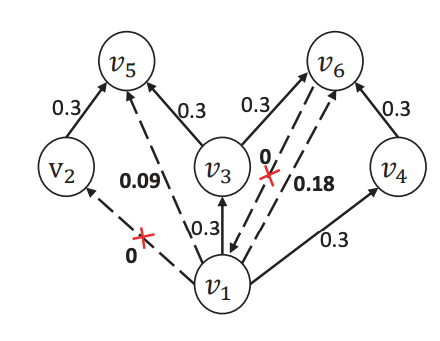

In [41]:
Image("/Users/fahimehb/Documents/NPP_GNN_project/code/HOPE.png", width=250, height=50)

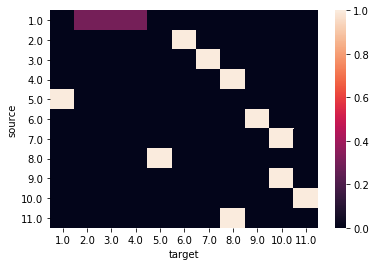

In [43]:
edges = pd.DataFrame([[1, 2, 0.3],
                      [1, 3, 0.3],
                      [1, 4, 0.3],
                      [2, 6, 1], 
                      [3, 7, 1], 
                      [4, 8, 1], 
                      [5, 1, 1], 
                      [6, 9, 1], 
                      [7, 10, 1], 
                      [8, 5, 1], 
                      [9, 10, 1], 
                      [10, 11, 1], 
                      [11, 8, 1]], columns=['source', 'target', 'weight'])
weight_mat = graph_utils.return_weight_mat_from_edgelist(edges, directed=True)
sns.heatmap(weight_mat)
adj = weight_mat.astype(float)

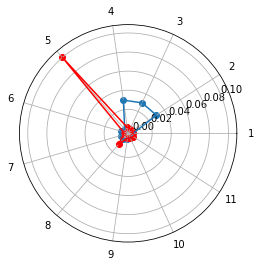

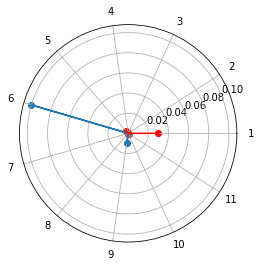

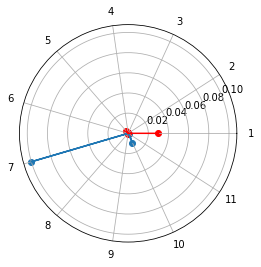

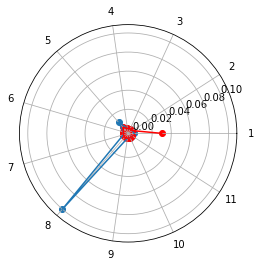

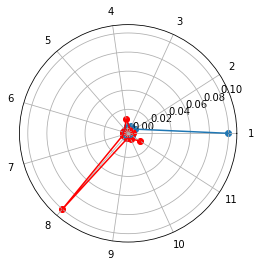

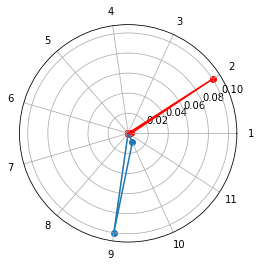

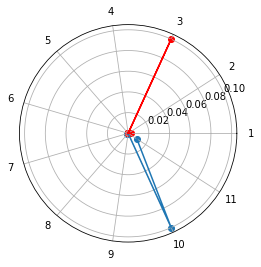

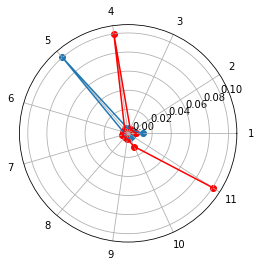

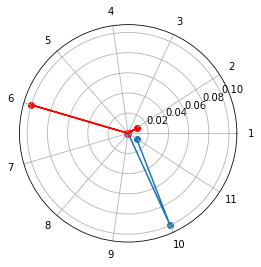

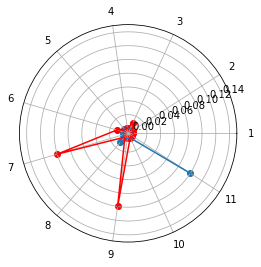

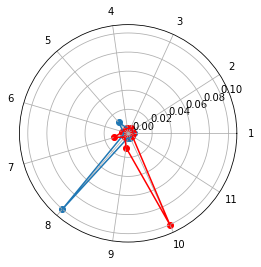

In [44]:
Katz = graph_utils.Katz_proximity(adj, beta = 0.1)
U_s, U_t = graph_utils.nmf_factorization(Katz, n_components=11)
s_to_t, t_to_s = graph_utils.return_right_left_similarity(U_s, U_t)
theta = graph_utils.return_theta(11)

for n in range(11):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    c = ax.plot(theta, s_to_t[n][[i for i in range(0,11)]])
    c = ax.scatter(theta, s_to_t[n][[i for i in range(0,11)]])
    c = ax.plot(theta, t_to_s[n][[i for i in range(0,11)]], c='red')
    c = ax.scatter(theta, t_to_s[n][[i for i in range(0,11)]], c='red')
    ax.set_xticks(theta)
    ax.set_xticklabels([str(i) for i in range(1,12)])

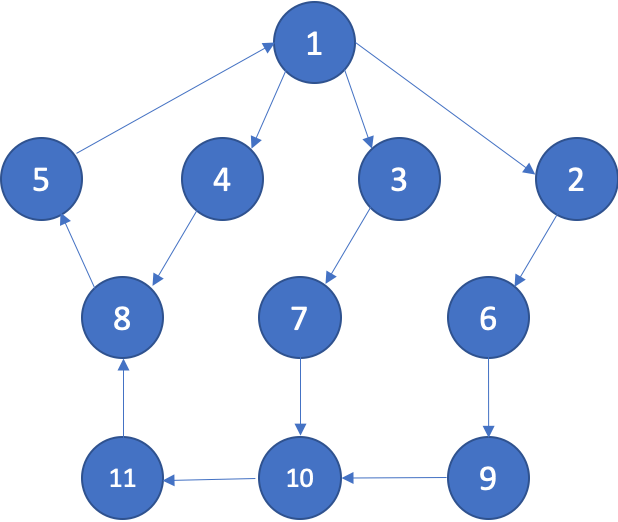

In [279]:
Image("/Users/fahimehb/Documents/NPP_GNN_project/code/directed_footbal_4_3_3_v2.png", width=250, height=50)

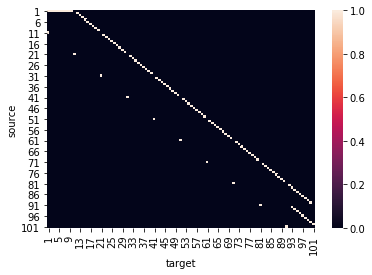

In [46]:
edges = pd.DataFrame([[1, 1, 1], [1, 2, 1], [1, 3, 1], [1, 4, 1], [1, 5, 1], [1, 6, 1], [1, 7, 1], [1, 8, 1], [1, 9, 1], [1, 10, 1],
                      [2, 12, 1], [3, 13, 1], [4, 14, 1], [5, 15, 1], [6, 16, 1], [7, 17, 1], [8, 18, 1], [9, 19, 1], [10, 20, 1], 
                      [12, 22, 1], [13, 23, 1], [14, 24, 1], [15, 25, 1], [16, 26, 1], [17, 27, 1], [18, 28, 1], [19, 29, 1], [20, 30, 1], 
                      [22, 32, 1], [23, 33, 1], [24, 34, 1], [25, 35, 1], [26, 36, 1], [27, 37, 1], [28, 38, 1], [29, 39, 1], [30, 40, 1], 
                      [32, 42, 1], [33, 43, 1], [34, 44, 1], [35, 45, 1], [36, 46, 1], [37, 47, 1], [38, 48, 1], [39, 49, 1], [40, 50, 1], 
                      [42, 52, 1], [43, 53, 1], [44, 54, 1], [45, 55, 1], [46, 56, 1], [47, 57, 1], [48, 58, 1], [49, 59, 1], [50, 60, 1], 
                      [52, 62, 1], [53, 63, 1], [54, 64, 1], [55, 65, 1], [56, 66, 1], [57, 67, 1], [58, 68, 1], [59, 69, 1], [60, 70, 1], 
                      [62, 72, 1], [63, 73, 1], [64, 74, 1], [65, 75, 1], [66, 76, 1], [67, 77, 1], [68, 78, 1], [69, 79, 1], [70, 80, 1], 
                      [72, 82, 1], [73, 83, 1], [74, 84, 1], [75, 85, 1], [76, 86, 1], [77, 87, 1], [78, 88, 1], [79, 89, 1], [80, 90, 1], 
                      [82, 92, 1], [83, 93, 1], [84, 94, 1], [85, 95, 1], [86, 96, 1], [87, 97, 1], [88, 98, 1], [89, 99, 1], [90, 100, 1], 
                      [92, 93, 1], [93, 94, 1], [94, 95, 1], [95, 96, 1], [96, 97, 1], [97, 98, 1], [98, 99, 1], [99, 100, 1], [100, 101, 1], 
                      [101, 91, 1], [91, 81, 1], [81, 71, 1], [71, 61, 1], [61, 51, 1], [51, 41, 1], [41, 31, 1], [31, 21, 1], [21, 11, 1],
                      [11, 1, 1]], columns=['source', 'target', 'weight'])

weight_mat = graph_utils.return_weight_mat_from_edgelist(edges, directed=True)
sns.heatmap(weight_mat)
adj = weight_mat.astype(float)

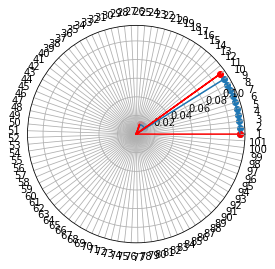

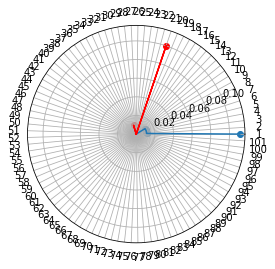

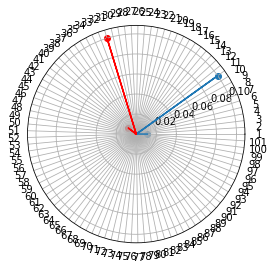

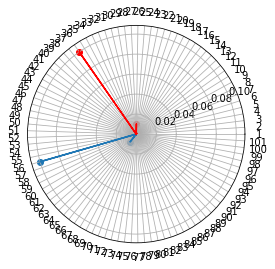

In [48]:
Katz = graph_utils.Katz_proximity(adj, beta = 0.1)
U_s, U_t = graph_utils.nmf_factorization(Katz, n_components=101)
s_to_t, t_to_s = graph_utils.return_right_left_similarity(U_s, U_t)
theta = graph_utils.return_theta(101)

for n in [0, 10, 20, 45]:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    c = ax.plot(theta, s_to_t[n][[i for i in range(0,101)]])
    c = ax.scatter(theta, s_to_t[n][[i for i in range(0,101)]])
    c = ax.plot(theta, t_to_s[n][[i for i in range(0,101)]], c='red')
    c = ax.scatter(theta, t_to_s[n][[i for i in range(0,101)]], c='red')
    ax.set_xticks(theta)
    ax.set_xticklabels([str(i) for i in range(1,102)])

### Combination of all graphs

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [294]:
similarity[i][np.argsort(-Katz[i])]

array([3.91295807e-04, 3.89627996e-04, 3.59853017e-04, 3.33838987e-04,
       3.30301889e-04, 3.21403698e-04, 3.06654202e-04, 2.93196982e-04,
       2.80148540e-04, 2.69397691e-04, 2.63041567e-04, 2.54535811e-04,
       2.53871022e-04, 2.48592062e-04, 2.35564407e-04, 2.27832991e-04,
       2.26345454e-04, 2.22776671e-04, 2.18069975e-04, 2.15857534e-04,
       1.98003065e-04, 1.96865561e-04, 1.95616933e-04, 1.90844363e-04,
       1.68867320e-04, 1.57138465e-04, 1.49217483e-04, 1.30445014e-04,
       1.12076054e-04, 1.11077866e-04, 1.07276830e-04, 1.04559376e-04,
       9.71586329e-05, 9.40320594e-05, 9.28690019e-05, 8.86945876e-05,
       7.97367587e-05, 7.72759619e-05, 7.19395089e-05, 7.03494452e-05,
       6.64959512e-05, 6.55863205e-05, 6.17427081e-05, 5.42227587e-05,
       5.33581704e-05, 5.31256772e-05, 5.30857312e-05, 5.13136182e-05,
       5.01322327e-05, 4.89803754e-05, 4.80356893e-05, 4.55396092e-05,
       4.39997592e-05, 4.32658263e-05, 4.30320484e-05, 4.23277293e-05,
      